# Simulator demo

In [102]:
import src.data as data
import src.simulation as sim
import src.normalization as norm
import scanpy as sc
import episcanpy as epi
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import src.plots as myplt
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
adata = data.load_mousebrain_window_mtx()
simulation_params = {'nCells': 50, 'noise.mean': -0.3, 'noise.sd': 0.3}
adata_sim = sim.simulate(adata, **simulation_params)

In [91]:
# annotation_name = 'cell_type'
# adata = data.load_mousebrain_window_mtx()
# simulation_params = {'nCells': 50, 'noise.mean': -0.3, 'noise.sd': 0.3}
# adata_sim = sim.simulate_by_annotation(adata, annotation_name=annotation_name, **simulation_params)

## Simulated lib size

In [104]:
adata_sim.obs['actualLibSize'] = np.ravel(adata_sim.X.sum(1))

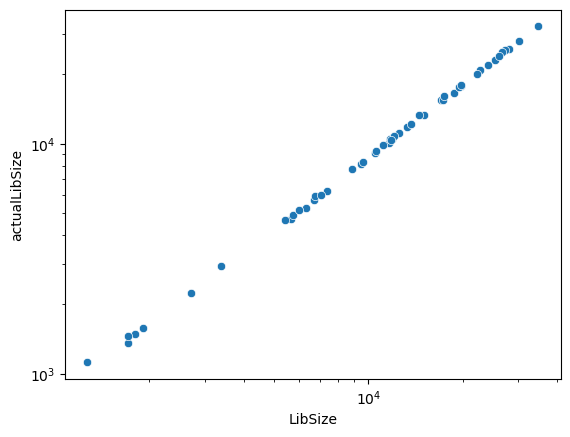

In [107]:
fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(adata_sim.obs, x='LibSize', y='actualLibSize', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

## QC visualization + determine filtering thresholds

In [5]:
epi.pp.qc_stats(adata_sim, verbose=True)

added keys n_cells, log_n_cells to .var
added keys n_features, log_n_features, n_counts, log_n_counts to .obs


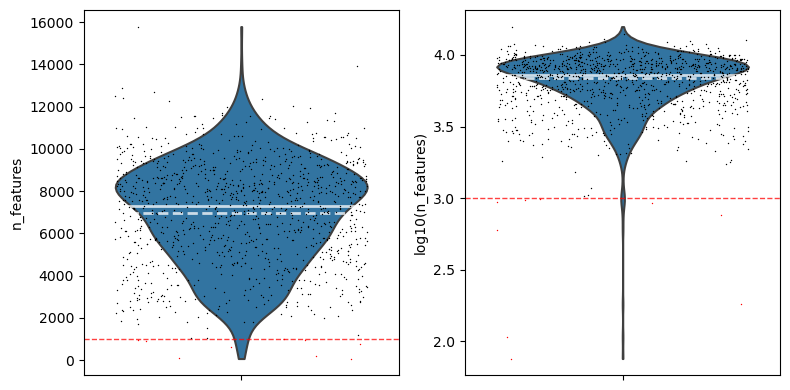

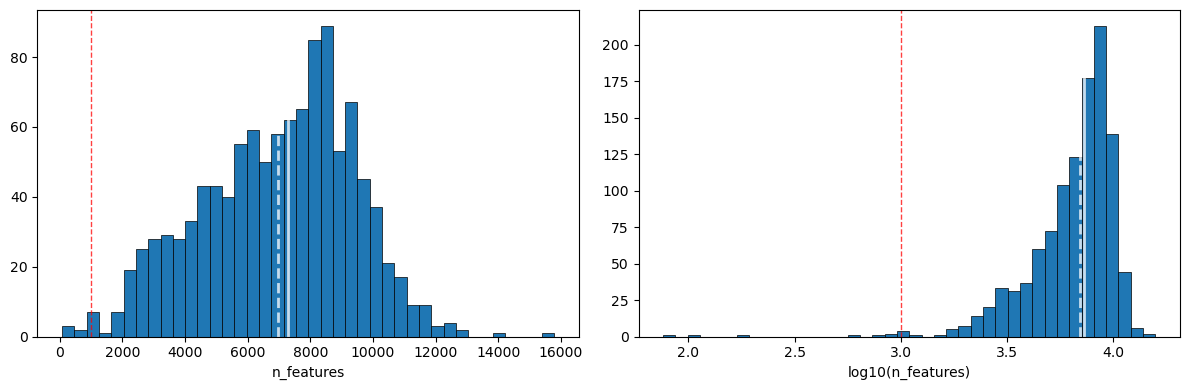

Max:	15786
Median:	7274.0
Mean:	6964.099090909091
Min:	76


In [6]:
min_features = 1000
max_features = None

epi.pl.violin(adata_sim, "n_features", min_threshold=min_features, max_threshold=max_features, show_log=True, show_mean=True, show_median=True, print_statistics=False, save=None)
epi.pl.histogram(adata_sim, "n_features", bins=40, min_threshold=min_features, max_threshold=max_features, show_log=True, show_mean=True, show_median=True, print_statistics=True, save=None)

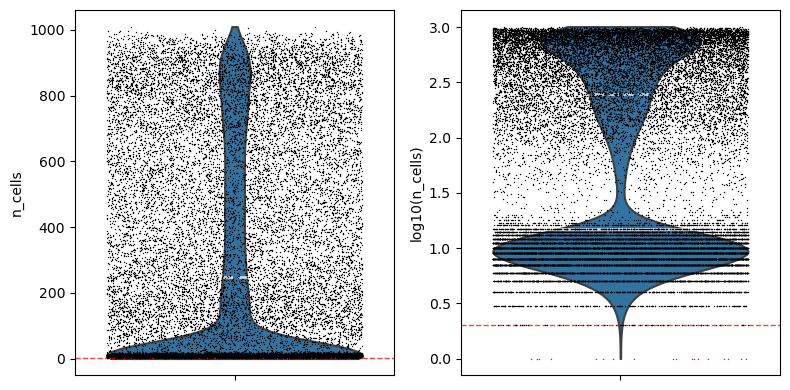

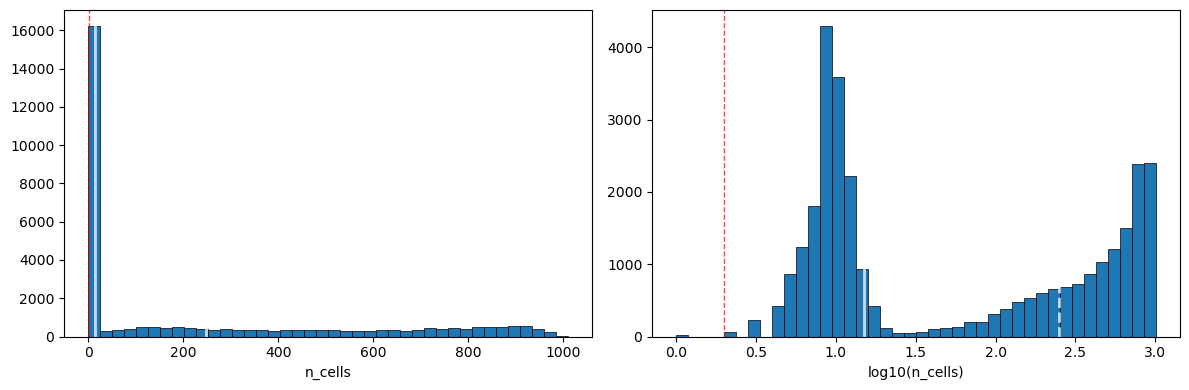

Max:	1010
Median:	15.0
Mean:	248.09758072351588
Min:	0


In [11]:
min_cells = 2
max_cells = None

epi.pl.violin(adata_sim, "n_cells", min_threshold=min_cells, max_threshold=max_cells, show_log=True, show_mean=True, show_median=True, print_statistics=False, save=None)
epi.pl.histogram(adata_sim, "n_cells", bins=40, min_threshold=min_cells, max_threshold=max_cells, show_log=True, show_mean=True, show_median=True, print_statistics=True, save=None)

### Set, check, and apply filters

In [22]:
epi.pp.set_filter(adata_sim, "n_features", min_threshold=min_features, max_threshold=max_features)
epi.pp.set_filter(adata_sim, "n_cells", min_threshold=min_cells)

1091 of 1091 observations remain (0)
21931 of 21931 features remain (0)


In [23]:
adata_sim = epi.pp.apply_filters(adata_sim, verbose=True)

1091 of 1091 observations remain (0)
21931 of 21931 features remain (0)


## Normalization


In [108]:
norm.log1pPF(adata_sim)

log1pPF_normalization layer added
pf_size_factors layer added


In [109]:
norm.scran(adata_sim)

scran_normalization layer added
scran_size_factors obs added


### Scran vs simulated library size

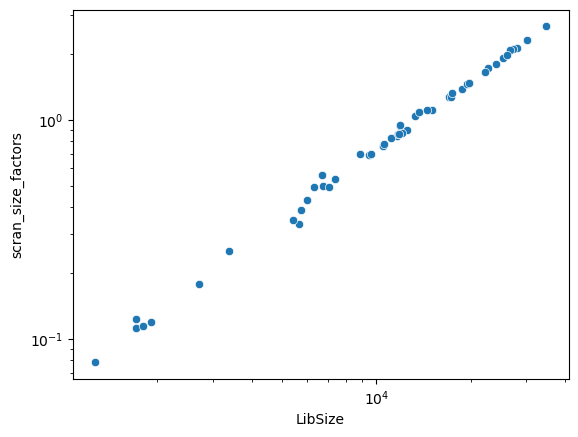

In [110]:
fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(adata_sim.obs, x='LibSize', y='scran_size_factors', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

### PF vs simulated library size

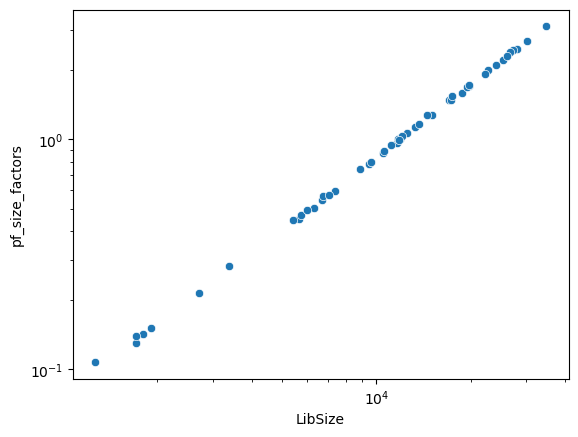

In [111]:
fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(adata_sim.obs, x='LibSize', y='pf_size_factors', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')